<a href="https://colab.research.google.com/github/Kendall3017/Proyecto-2/blob/main/Copy_of_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  PASO 1: Instalar librerías necesarias
!pip install -q sentence-transformers openpyxl
!pip install nbconvert
#  PASO 2: Importar librerías
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch


# PASO 3: Cargar y limpiar el archivo Excel
# Subir el archivo: usa el ícono de carpeta en la izquierda de Colab y súbelo ahí
df = pd.read_excel('/content/sample_data/chatbot_dataset_10_intenciones.xlsx', header=None)

# Seleccionar columnas: pregunta, respuesta, categoría
df_chatbot = df[[0, 1, 2]]
df_chatbot.columns = ['frase', 'answer', 'intention']
df_chatbot.dropna(inplace=True)
df_chatbot = df_chatbot.iloc[1:]  # Eliminar fila 0 que es encabezado en los datos
df_chatbot.reset_index(drop=True, inplace=True)

# Limpiar texto
df_chatbot['frase'] = df_chatbot['frase'].astype(str).str.lower().str.strip()
df_chatbot['intention'] = df_chatbot['intention'].astype(str).str.lower().str.strip()
df_chatbot['answer'] = df_chatbot['answer'].astype(str).str.strip()

# Mostrar primeras filas para verificar
df_chatbot.head()

# PASO 4: Cargar modelo y vectorizar las frases base
modelo = SentenceTransformer('all-MiniLM-L6-v2')

# Convertir a listas
frases = df_chatbot['frase'].tolist()
respuestas = df_chatbot['answer'].tolist()
intenciones = df_chatbot['intention'].tolist()

# Vectorizar las frases base
embeddings_base = modelo.encode(frases, convert_to_tensor=True)

# PASO 5: Función del chatbot
def responder_chatbot(texto_usuario):
    texto_usuario = texto_usuario.lower().strip()

    # Vectorizar entrada del usuario
    embedding_usuario = modelo.encode(texto_usuario, convert_to_tensor=True)

    # Calcular similaridades
    similitudes = util.cos_sim(embedding_usuario, embeddings_base)[0].cpu().numpy()
    idx_max = similitudes.argmax()

    # Extraer mejor coincidencia
    frase_relacionada = frases[idx_max]
    respuesta = respuestas[idx_max]
    intencion = intenciones[idx_max]
    puntuacion = similitudes[idx_max]

    # Mostrar resultados
    print(f"\n Usuario: {texto_usuario}")
    print(f" Intención detectada: {intencion}")
    print(f" Frase más parecida: '{frase_relacionada}'")
    print(f" Similaridad: {puntuacion:.4f}")
    print(f" Respuesta del bot: {respuesta}")

#  PASO 6: Probar el chatbot con ejemplos
ejemplos = [
    "no puedo ingresar a mi cuenta",
    "me pueden enviar la factura?",
    "cuál es el horario?",
    "cómo puedo devolver un producto",
    "hola",
    "tienen ropa de niños?",
    "aceptan sinpe?",
    "cómo accedo a mi perfil",
    "quiero cancelar una orden",
    "cuánto tarda el envío?"
]

#for pregunta in ejemplos:
    #responder_chatbot(pregunta)
    #print("—" * 60)

while True:
    pregunta = input("Tú: ")
    if pregunta.lower() in ['salir', 'quit']:
        print("👋 ¡Hasta luego!")
        break
    responder_chatbot(pregunta)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Tú: acceso

 Usuario: acceso
 Intención detectada: registro y acceso
 Frase más parecida: '¿qué hago si olvidé mi contraseña?'
 Similaridad: 0.4794
 Respuesta del bot: Usa la opción 'Olvidé mi contraseña' en el login.


KeyboardInterrupt: Interrupted by user

/tmp/ipython-input-2-850923925.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_intenciones.index, y=conteo_intenciones.values, palette='viridis')


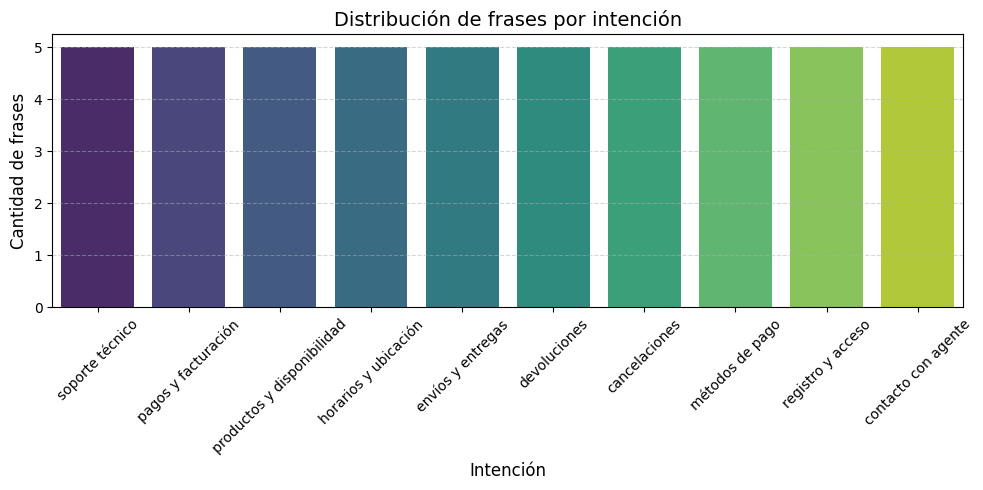

In [2]:
#  PASO 1: Instalar librerías necesarias
!pip install -q sentence-transformers openpyxl
!pip install nbconvert
#  PASO 2: Importar librerías
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
import matplotlib.pyplot as plt
import seaborn as sns

#  PASO 3: Cargar y limpiar el archivo Excel
# Subir el archivo: usa el ícono de carpeta en la izquierda de Colab y súbelo ahí
df = pd.read_excel('/content/sample_data/chatbot_dataset_10_intenciones.xlsx', header=None)

# Seleccionar columnas: pregunta, respuesta, categoría
df_chatbot = df[[0, 1, 2]]
df_chatbot.columns = ['frase', 'answer', 'intention']
df_chatbot.dropna(inplace=True)
df_chatbot = df_chatbot.iloc[1:]  # Eliminar fila 0 que es encabezado en los datos
df_chatbot.reset_index(drop=True, inplace=True)

# Limpiar texto
df_chatbot['frase'] = df_chatbot['frase'].astype(str).str.lower().str.strip()
df_chatbot['intention'] = df_chatbot['intention'].astype(str).str.lower().str.strip()
df_chatbot['answer'] = df_chatbot['answer'].astype(str).str.strip()

# Mostrar primeras filas para verificar
df_chatbot.head()

# PASO 4: Cargar modelo y vectorizar las frases base
modelo = SentenceTransformer('all-MiniLM-L6-v2')

# Convertir a listas
frases = df_chatbot['frase'].tolist()
respuestas = df_chatbot['answer'].tolist()
intenciones = df_chatbot['intention'].tolist()

# Vectorizar las frases base
embeddings_base = modelo.encode(frases, convert_to_tensor=True)

#  PASO 5: Función del chatbot
def responder_chatbot(texto_usuario):
    texto_usuario = texto_usuario.lower().strip()

    # Vectorizar entrada del usuario
    embedding_usuario = modelo.encode(texto_usuario, convert_to_tensor=True)

    # Calcular similaridades
    similitudes = util.cos_sim(embedding_usuario, embeddings_base)[0].cpu().numpy()
    idx_max = similitudes.argmax()

    # Extraer mejor coincidencia
    frase_relacionada = frases[idx_max]
    respuesta = respuestas[idx_max]
    intencion = intenciones[idx_max]
    puntuacion = similitudes[idx_max]

    # Mostrar resultados
    print(f"\n Usuario: {texto_usuario}")
    print(f" Intención detectada: {intencion}")
    print(f"Frase más parecida: '{frase_relacionada}'")
    print(f" Similaridad: {puntuacion:.4f}")
    print(f" Respuesta del bot: {respuesta}")

# PASO 6: Probar el chatbot con ejemplos
ejemplos = [
    "no puedo ingresar a mi cuenta",
    "me pueden enviar la factura?",
    "cuál es el horario?",
    "cómo puedo devolver un producto",
    "hola",
    "tienen ropa de niños?",
    "aceptan sinpe?",
    "cómo accedo a mi perfil",
    "quiero cancelar una orden",
    "cuánto tarda el envío?"
]

#for pregunta in ejemplos:
    #responder_chatbot(pregunta)
    #print("—" * 60)

# Contar cuántas frases hay por intención
conteo_intenciones = df_chatbot['intention'].value_counts()

# Crear gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_intenciones.index, y=conteo_intenciones.values, palette='viridis')

plt.title("Distribución de frases por intención", fontsize=14)
plt.xlabel("Intención", fontsize=12)
plt.ylabel("Cantidad de frases", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

